# Compare Kepler and TESS amplitudes of rotation.
## McQuillan sample

In [1]:
# %load /Users/obsidian/Desktop/defaults.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('talk')

from astropy.io import ascii
from astropy.io import fits

Let's read in McQuillan et al. Table 1.  We seek to replicate Figure 4.

In [2]:
#! wget https://iopscience.iop.org/0067-0049/211/2/24/suppdata/apjs492452t1_mrt.txt
#! mkdir ../data/McQuillan2014
#! mv apjs492452t1_mrt.txt ../data/McQuillan2014/

In [3]:
tab1 = ascii.read('../data/McQuillan2014/apjs492452t1_mrt.txt')

In [4]:
df1 = tab1.to_pandas()

In [5]:
df1.columns

Index(['KIC', 'Teff', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper', 'LPH', 'w',
       'DC', 'Flag'],
      dtype='object')

### Let's update the effective temperature from Gaia

Hmm... lots of artificial structure in the Gaia-provided $T_{\mathrm{eff}}$ and Luminosity estimates, which is known: the DPAC-provided values are *illustrative* coarse estimates.  Let's use values from **Berger et al. 2018**.

In [6]:
#! wget https://iopscience.iop.org/0004-637X/866/2/99/suppdata/apjaada83t1_mrt.txt
#! mkdir ../data/Berger2018
#! mv apjaada83t1_mrt.txt ../data/Berger2018/

In [7]:
tab3 = ascii.read('../data/Berger2018/apjaada83t1_mrt.txt')

In [8]:
df3 = tab3.to_pandas()

In [9]:
df3.head()

KIC                 Gaia  Teff  e_Teff        D     E_D     e_D      R*  \
0  757076  2050233807328471424  5164     181  658.465  21.419  20.163   3.986   
1  757099  2050233601176543104  5521     193  369.374   3.708   3.645   1.053   
2  757137  2050230543159814656  4751     166  570.715   8.271   8.060  13.406   
3  757280  2050230611879323904  6543     229  824.791  15.079  14.586   2.687   
4  757450  2050231848829944320  5306     106  835.371  18.423  17.692   0.962   

    E_R*   e_R*     AV  Evol  Bin  
0  0.324  0.293  0.273     1    0  
1  0.078  0.071  0.120     0    0  
2  1.004  0.916  0.230     2    0  
3  0.205  0.186  0.323     0    0  
4  0.047  0.044  0.298     0    0

Text(0, 0.5, '$R/R_{\\odot}$')

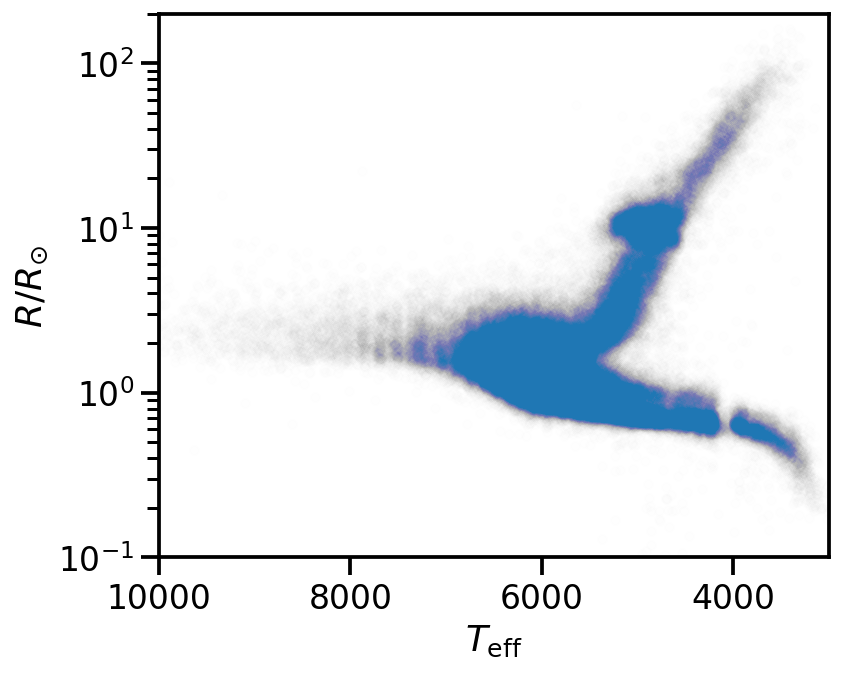

In [10]:
plt.figure(figsize=(6, 5))
plt.plot(df3.Teff, df3['R*'], '.', alpha=0.003)
plt.xlim(10000, 3000)
plt.ylim(1.0e-1, 2.0e2)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')

Resembles Figure 3 of Berger et al. 2018.

In [11]:
df4 = pd.merge(df1, df3, how='outer', on='KIC', indicator=True, suffixes=('_McQuillan14', '_Berger18'))

In [12]:
df4.columns

Index(['KIC', 'Teff_McQuillan14', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper',
       'LPH', 'w', 'DC', 'Flag', 'Gaia', 'Teff_Berger18', 'e_Teff', 'D', 'E_D',
       'e_D', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin', '_merge'],
      dtype='object')

In [13]:
df4.head()

KIC  Teff_McQuillan14  log(g)    Mass    PRot  e_PRot      Rper    LPH  \
0   892376            3813.0    4.47  0.4699   1.532   0.007   7306.69  0.823   
1  1026146            4261.0    4.57  0.6472  14.891   0.120  11742.56  1.405   
2  1026474            4122.0    4.56  0.5914   1.569   0.006  30471.80  1.204   
3  1162635            3760.0    4.77  0.4497  15.678   0.019  10207.47  0.978   
4  1164102            4045.0    4.62  0.5606  31.496   0.474   5139.74  0.568   

        w   DC  ...        D    E_D    e_D     R*   E_R*   e_R*     AV  Evol  \
0  0.4503  0.0  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1  0.7229  0.0  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2  0.6061  0.0  ...  370.030  5.947  5.777  0.679  0.054  0.049  0.136   0.0   
3  0.5445  1.0  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
4  0.3939  0.0  ...  341.025  3.369  3.313  0.626  0.047  0.043  0.079   0.0   

   Bin     _merge  
0  NaN  left_only  
1  NaN  left_only  
2  0.0       both  
3  NaN  left_only  
4  0.0       both  

[5 rows x 24 columns]

In [14]:
df4._merge.value_counts()

right_only    147861
both           30050
left_only       3980
Name: _merge, dtype: int64

Ok, so the McQuillan sample identified periods for 34,030 Kepler lightcurves.  11.7% of the McQuillan sample do not appear in Berger et al. 2018 for unknown reasons, perhaps because of issues with Gaia Dr2 or misclassifications, etc.

In [15]:
df4.columns

Index(['KIC', 'Teff_McQuillan14', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper',
       'LPH', 'w', 'DC', 'Flag', 'Gaia', 'Teff_Berger18', 'e_Teff', 'D', 'E_D',
       'e_D', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin', '_merge'],
      dtype='object')

In [16]:
"{:0.1%}".format(3980 / (30050 + 3980))

'11.7%'

In [17]:
keep_cols5 = ['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper',
       'Teff_Berger18', 'e_Teff','R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin']

In [18]:
df5 = df4[df4._merge == 'both'].reset_index(drop=True)[keep_cols5]

In [19]:
df5.head()

KIC  Teff_McQuillan14    PRot  e_PRot      Rper  Teff_Berger18  e_Teff  \
0  1026474            4122.0   1.569   0.006  30471.80         4276.0   150.0   
1  1164102            4045.0  31.496   0.474   5139.74         4206.0   147.0   
2  1292688            3774.0  42.659   2.131   6320.15         3774.0   132.0   
3  1297303            4296.0  27.333   0.193   6189.53         4447.0   156.0   
4  1429921            4217.0  23.131   0.110  15370.91         4356.0   152.0   

      R*   E_R*   e_R*     AV  Evol  Bin  
0  0.679  0.054  0.049  0.136   0.0  0.0  
1  0.626  0.047  0.043  0.079   0.0  0.0  
2  0.525  0.015  0.015  0.107   0.0  0.0  
3  0.662  0.051  0.046  0.176   0.0  0.0  
4  0.644  0.051  0.046  0.244   0.0  0.0

Text(0, 0.5, '$T_{\\mathrm{eff}}$ Berger et al. 2018')

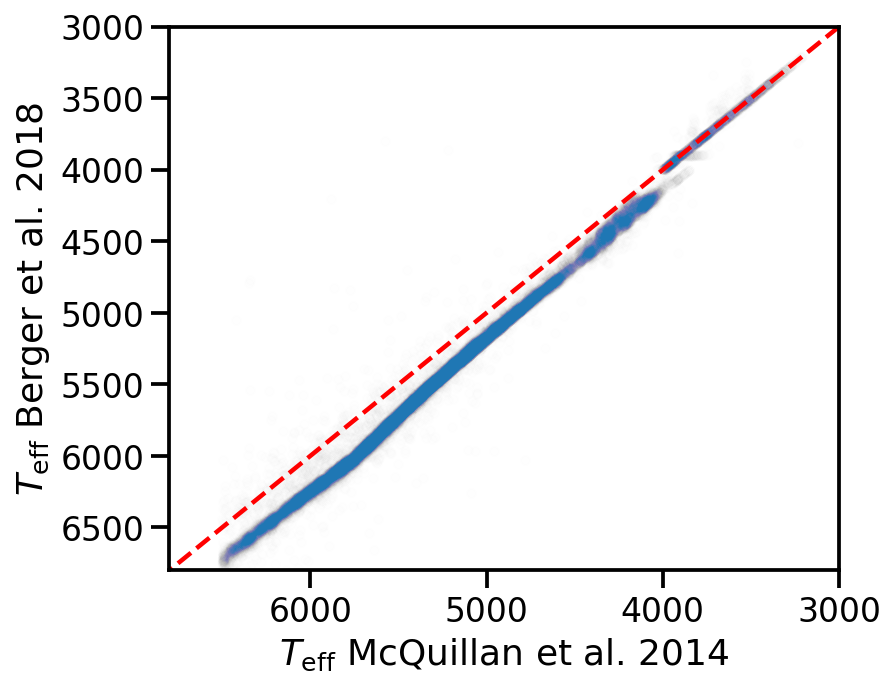

In [20]:
x_vals = np.arange(3000, 6801, 100)
plt.figure(figsize=(6, 5))
plt.plot(df5.Teff_McQuillan14, df5.Teff_Berger18, '.', alpha=0.003)
plt.xlim(6800, 3000)
plt.ylim(6800, 3000)
plt.plot(x_vals, x_vals, 'r--')
plt.xlabel('$T_{\mathrm{eff}}$ McQuillan et al. 2014')
plt.ylabel('$T_{\mathrm{eff}}$ Berger et al. 2018')

Fascinating bias!

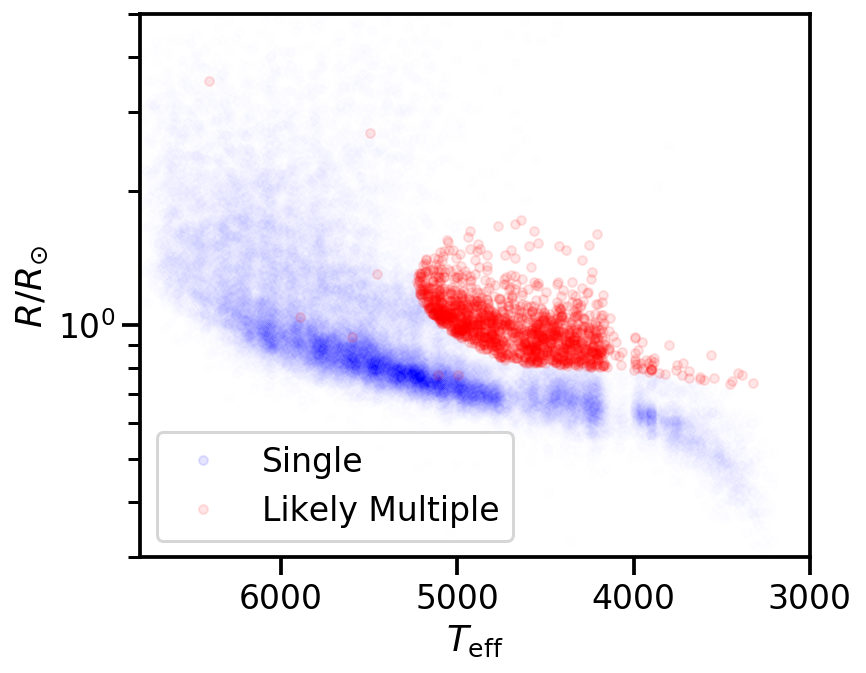

In [21]:
plt.figure(figsize=(6, 5))
singleton = df5.Bin == 0 
multi = df5.Bin > 0 
plt.plot(df5.Teff_Berger18[singleton], df5['R*'][singleton].values, 'b.', alpha=0.003)
plt.plot(1.0,1, 'b.', alpha=0.1, label='Single')
plt.plot(df5.Teff_Berger18[multi], df5['R*'][multi], 'r.', alpha=0.1, label='Likely Multiple')
plt.xlim(6800, 3000)
plt.ylim(3.0e-1, 5.0e0)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')
plt.legend(loc='best');

You can see the binary main sequence.  Nice.

In [22]:
df6 = df5[singleton].reset_index(drop=True)

In [23]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

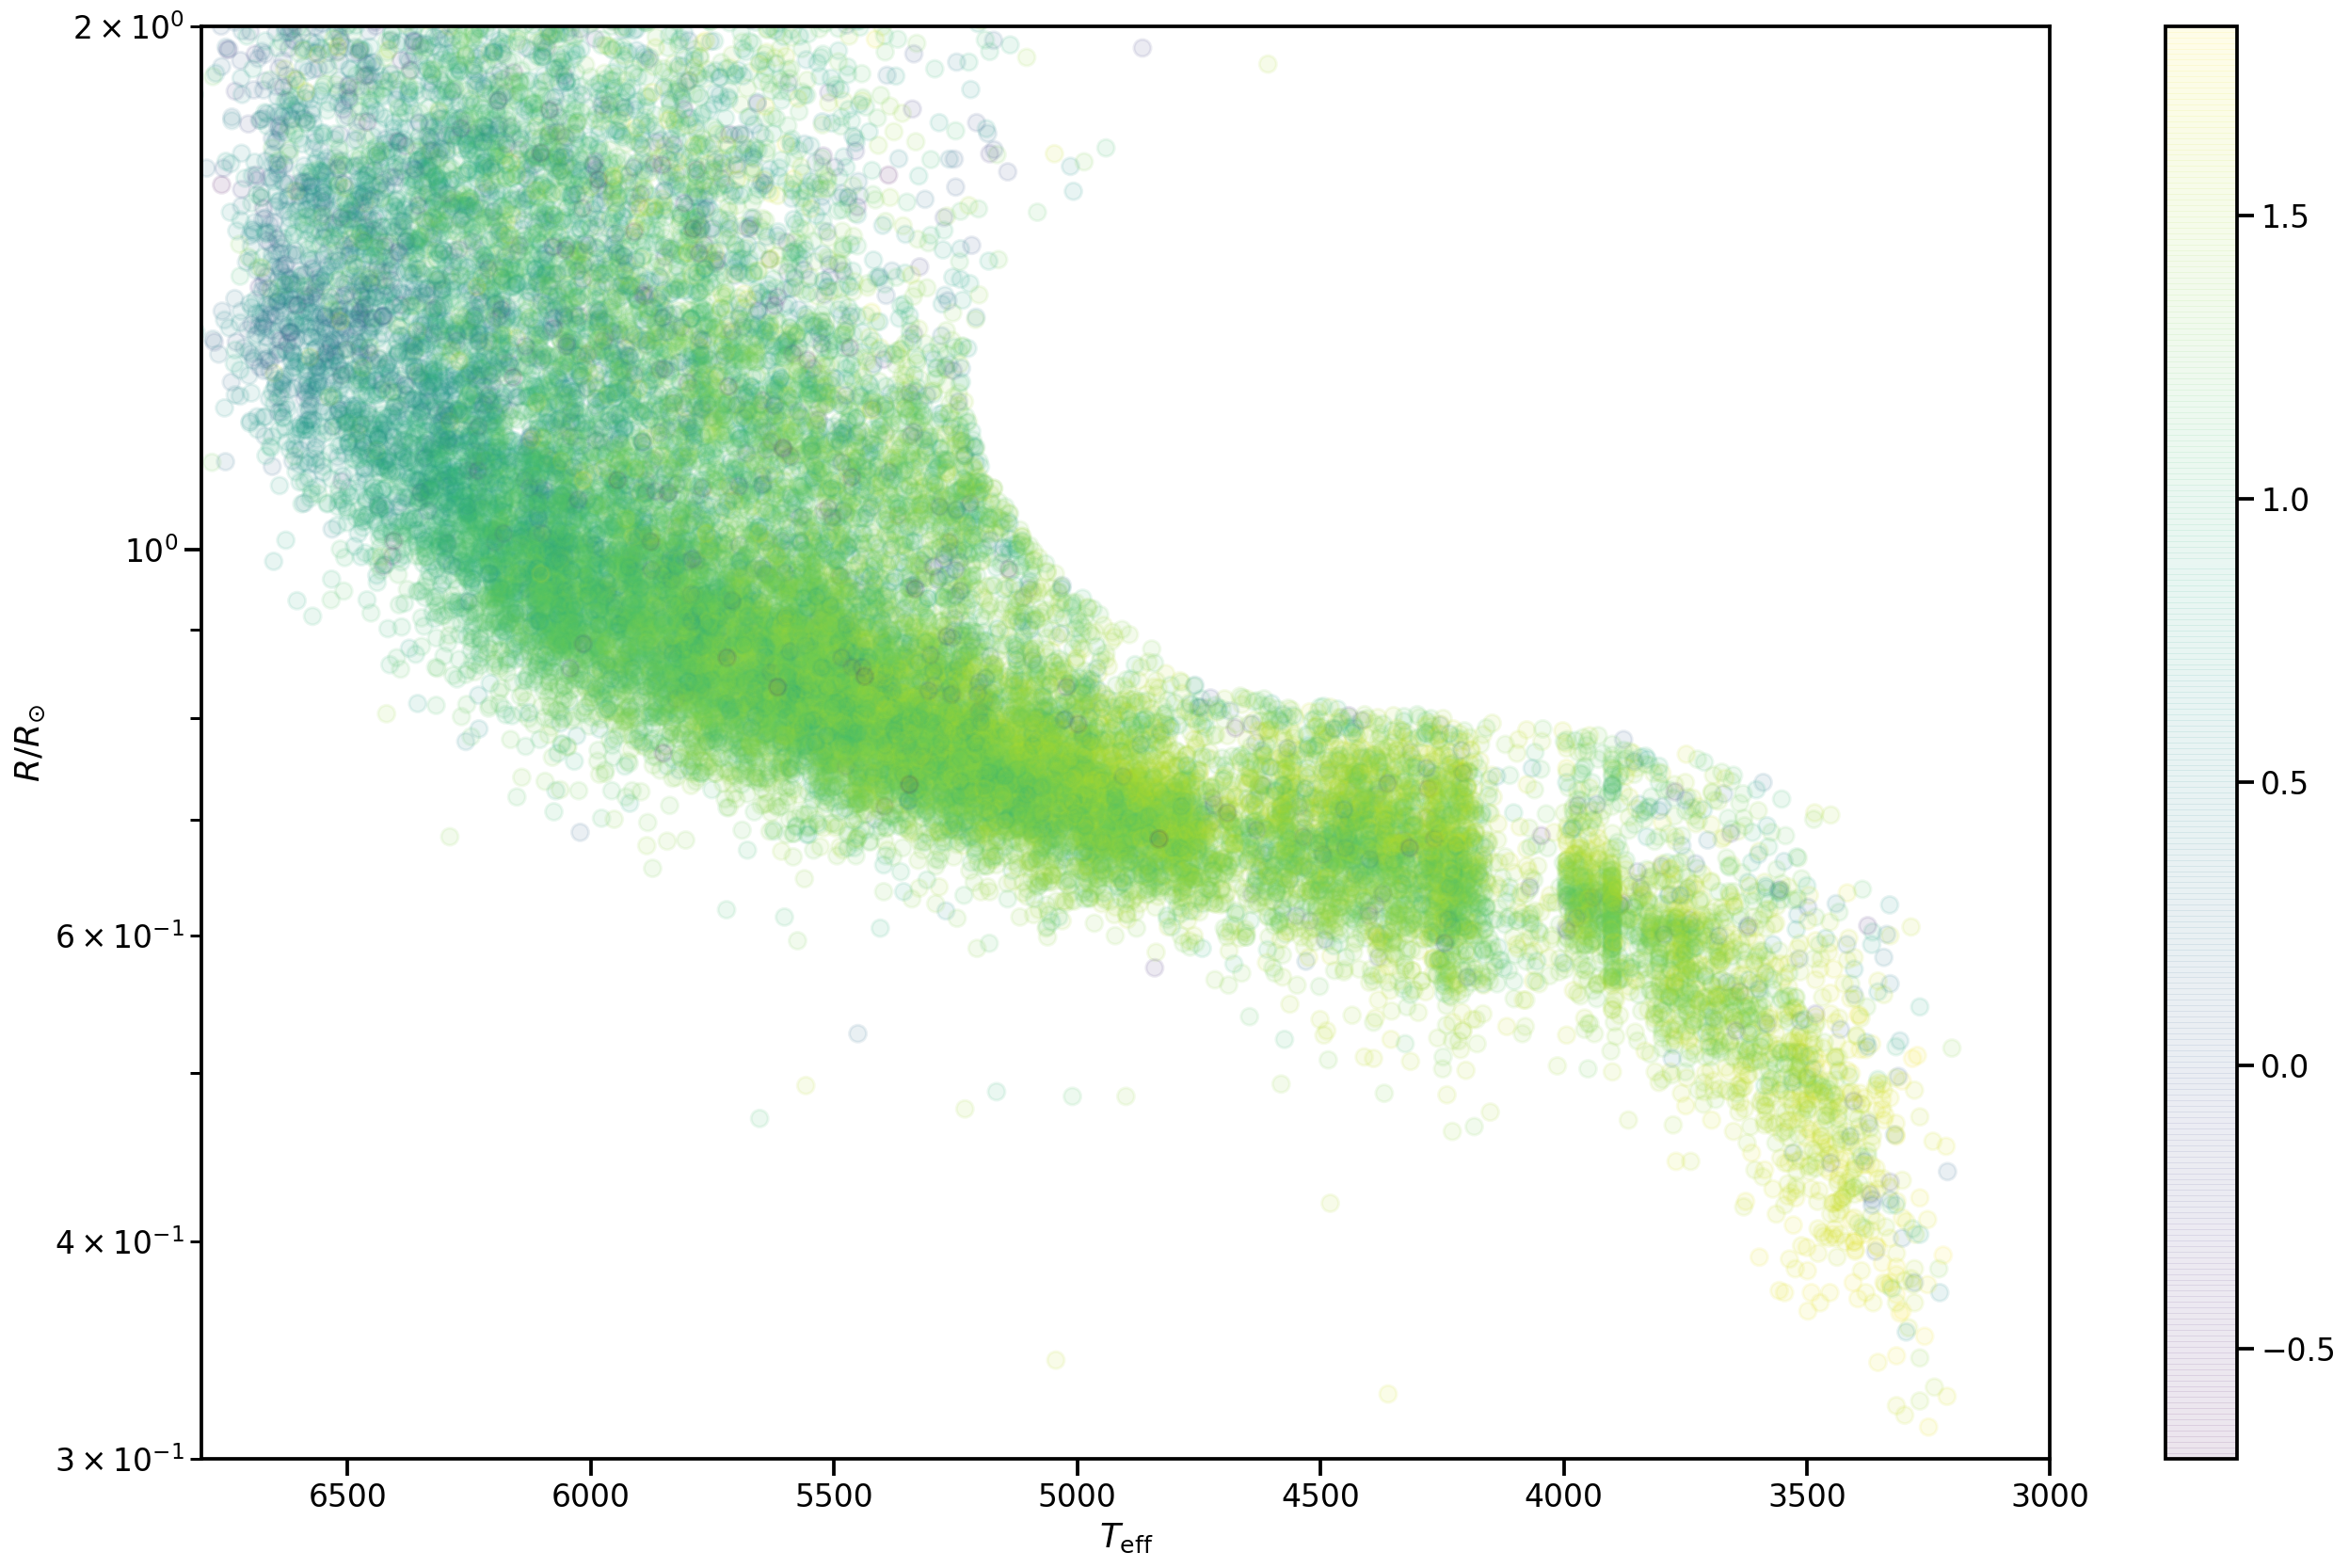

In [24]:
plt.figure(figsize=(22, 14))

sc = plt.scatter(df6.Teff_Berger18, df6['R*'].values, c=np.log10(df6.PRot), alpha=0.1)
plt.xlim(6800, 3000)
plt.ylim(3.0e-1, 2.0e0)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')
plt.colorbar(sc, alpha=1);

If you squint, you can sort of see a trend in the M-dwarfs.

## Replicate Figure 4 of McQuillan

<img width=900 src=https://iopscience.iop.org/0067-0049/211/2/24/downloadHRFigure/figure/apjs492452f4></src>

In [25]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

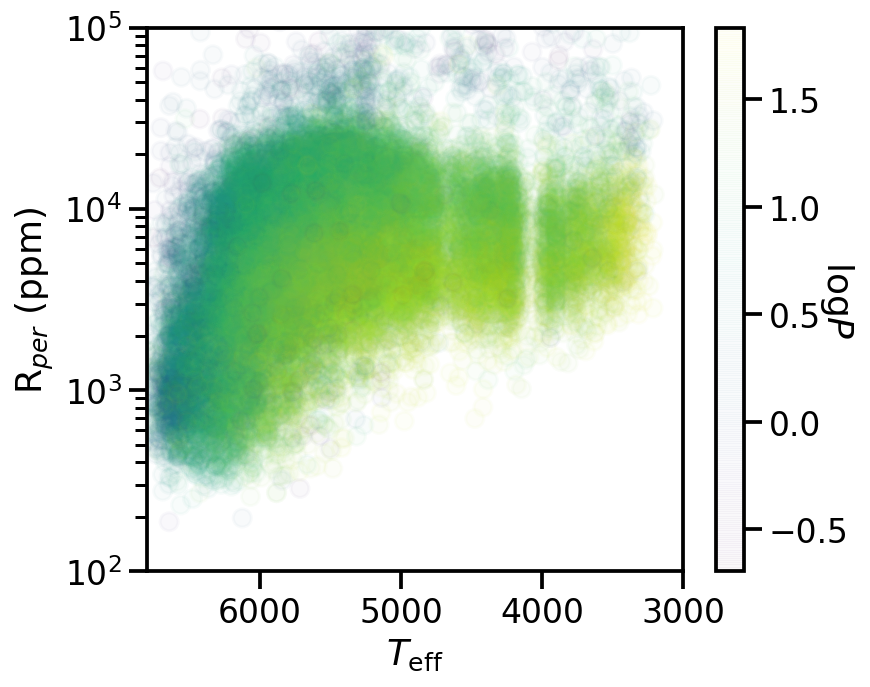

In [26]:
plt.figure(figsize=(6, 5))

sc = plt.scatter(df6.Teff_Berger18, df6['Rper'].values, c=np.log10(df6.PRot), alpha=0.03)
plt.xlim(6800, 3000)
plt.ylim(1e2, 1e5)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$\mathsf{R}_{per}$ (ppm)')
cbar = plt.colorbar(sc, alpha=1)
cbar.set_label('$\log{P}$', rotation=270)

In [27]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

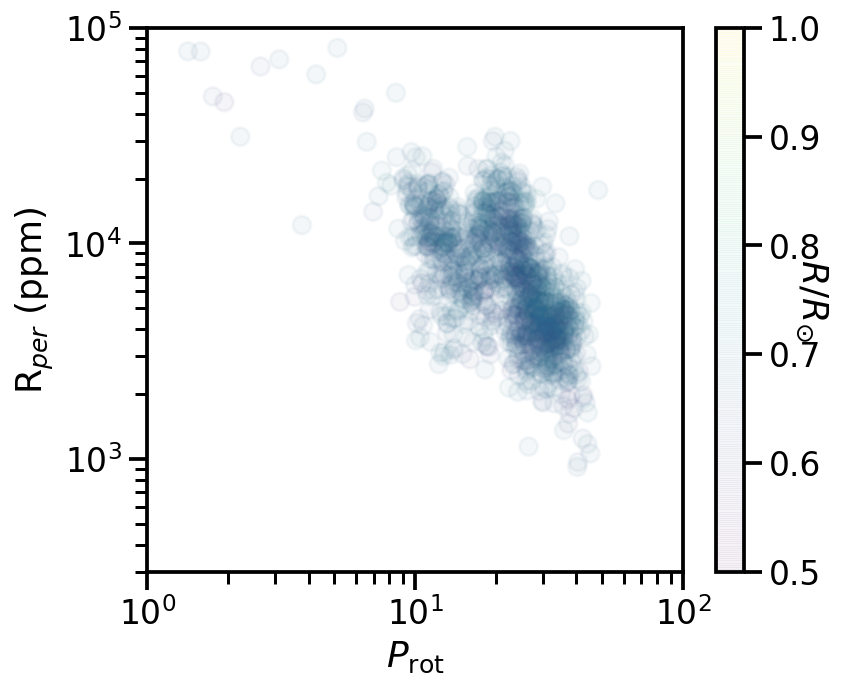

In [28]:
plt.figure(figsize=(6, 5))

teff_cut = (df6.Teff_Berger18 > 4500) & (df6.Teff_Berger18 < 5000) 

radius_cut = df6['R*'] < 0.7
subset = teff_cut & radius_cut
sc = plt.scatter(df6.PRot[subset], df6['Rper'][subset].values, c=df6['R*'][subset], alpha=0.05, vmin=0.5, vmax=1.0)
plt.ylim(3e2, 1e5)
plt.xlim(1e0, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$P_{\mathrm{rot}}$')
plt.ylabel('$\mathsf{R}_{per}$ (ppm)')
cbar = plt.colorbar(sc, alpha=1)
cbar.set_label('$R/R_{\odot}$', rotation=270)

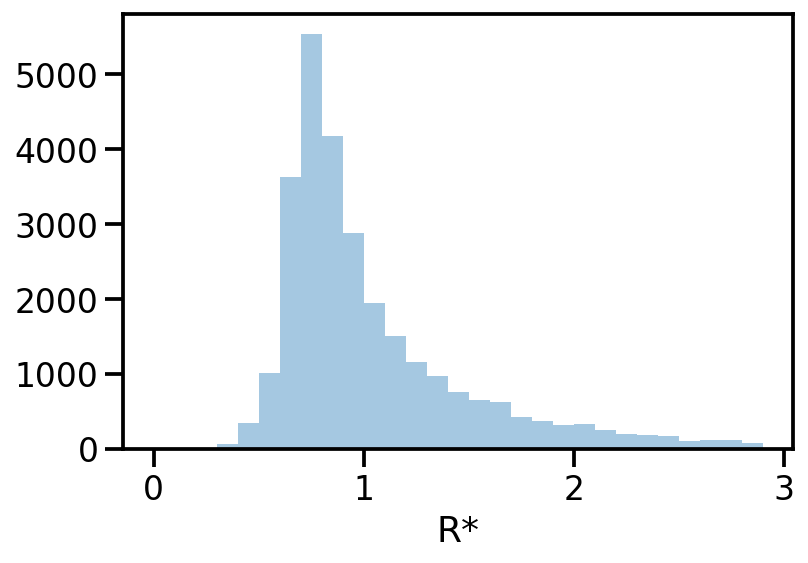

In [29]:
sns.distplot(df6['R*'], bins=np.arange(0, 3, 0.1), kde=False)

In [30]:
fake_subset = (df6['Rper'] > 1e3)  & (df6.PRot < 27)
fake_rapid = (df6['Rper'] > 1e4)  & (df6.PRot < 10)

In [31]:
net = fake_subset & subset
fake_dat = df6['Rper'][net].values*0.4
fake_dat_r = df6['Rper'][fake_rapid & subset].values*0.4

In [32]:
! ls ../proposals/TESS_GI_cycle02/figures/

fig1.pdf        multi_panel.pdf


Text(0, 0.5, 'Lightcurve Amplitude, $A$ (ppm)')

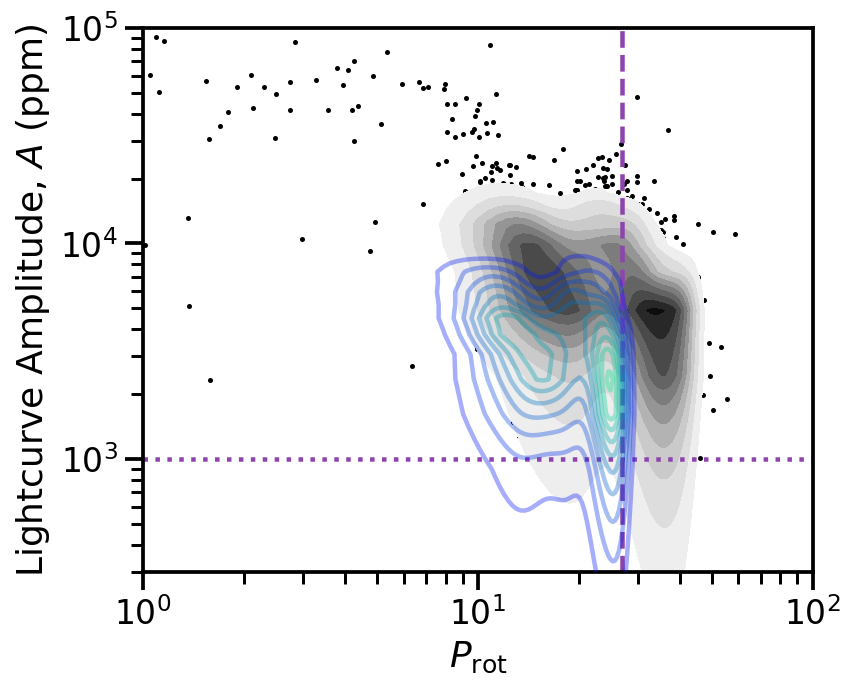

In [33]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

#teff_cut = (df6.Teff_Berger18 < 4000) 
teff_cut = (df6.Teff_Berger18 > 4000) & (df6.Teff_Berger18 < 4500) 
#teff_cut = (df6.Teff_Berger18 > 4500) & (df6.Teff_Berger18 < 5000) 
#teff_cut = (df6.Teff_Berger18 > 5000) & (df6.Teff_Berger18 < 5500) 

subset = teff_cut
plt.plot(df6.PRot[subset], df6['Rper'][subset].values, 'k.', ms=3, zorder=1)
sns.kdeplot(df6.PRot[subset], df6['Rper'][subset].values,shade=True, shade_lowest=False, cmap='Greys', zorder=2)

sns.kdeplot(df6.PRot[net], fake_dat,cmap='winter', alpha=0.35, zorder=3)
#sns.kdeplot(df6.PRot[fake_rapid & subset], fake_dat_r,cmap='autumn', alpha=0.35, zorder=3)

plt.axvline(27, linestyle='dashed', color='#8e44ad')
plt.axhline(1e3, linestyle='dotted', color='#8e44ad')

#subset = teff_cut & ~radius_cut
#sns.kdeplot(df6.PRot[subset], df6['Rper'][subset].values)
plt.ylim(3e2, 1e5)
plt.xlim(1e0, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$P_{\mathrm{rot}}$')
plt.ylabel('Lightcurve Amplitude, $A$ (ppm)')
#plt.savefig('../proposals/TESS_GI_cycle02/figures/fig1.pdf', bbox_inches='tight')

# New science 2019!

Ok, Let's take the rapidly rotating subset and get their TESS amplitudes!

In [34]:
import lightkurve as lk

In [35]:
rapid_rotators = df6['PRot'] < 8.0

In [164]:
short_df = df6[subset & rapid_rotators]

In [238]:
ii = 1

In [239]:
kic_id = short_df['KIC'].iloc[ii]

In [240]:
kic_id

2985366

In [241]:
target = "KIC {:}".format(kic_id)

In [242]:
target

'KIC 2985366'

In [243]:
lcf = lk.search_lightcurvefile(target, mission='Kepler')[-1].download()

In [244]:
lcf.hdu[0].header['KEPMAG']

13.478

In [245]:
#lcf = lcfs[0]

In [246]:
#lcfs_target = lk.LightCurveFileCollection([lcf for lcf in lcfs if lcf.targetid == kic_id])

In [247]:
#long_lc = lcfs_target.PDCSAP_FLUX.stitch()

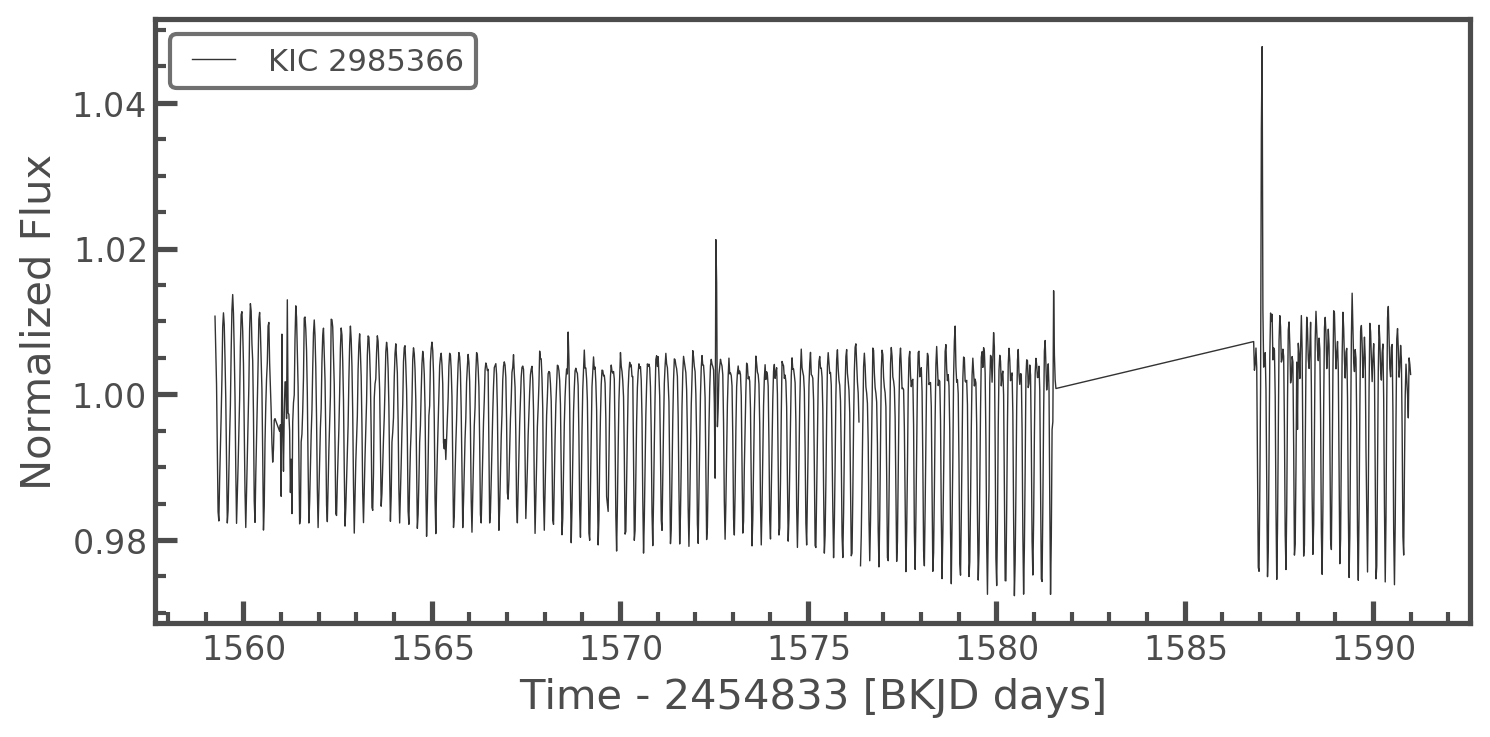

In [269]:
lcf.PDCSAP_FLUX.plot(normalize=True)

In [249]:
tess_tpf = lk.search_tesscut(target).download(cutout_size=10)

In [250]:
target_mask = tess_tpf.create_threshold_mask(2)

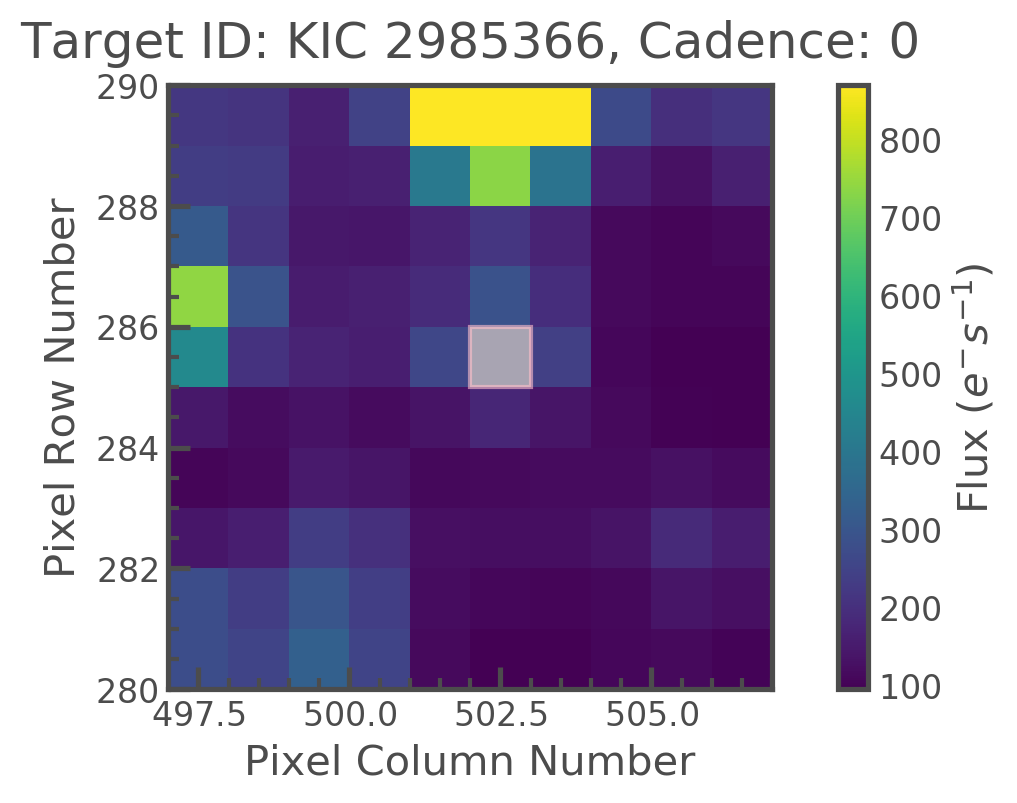

In [251]:
tess_tpf.plot(aperture_mask=target_mask)

In [252]:
#tess_tpf.interact(notebook_url='localhost:8889', aperture_mask=target_mask)

Lots of background

In [253]:
bkg_mask = ~tess_tpf.create_threshold_mask(0.01, reference_pixel=None)

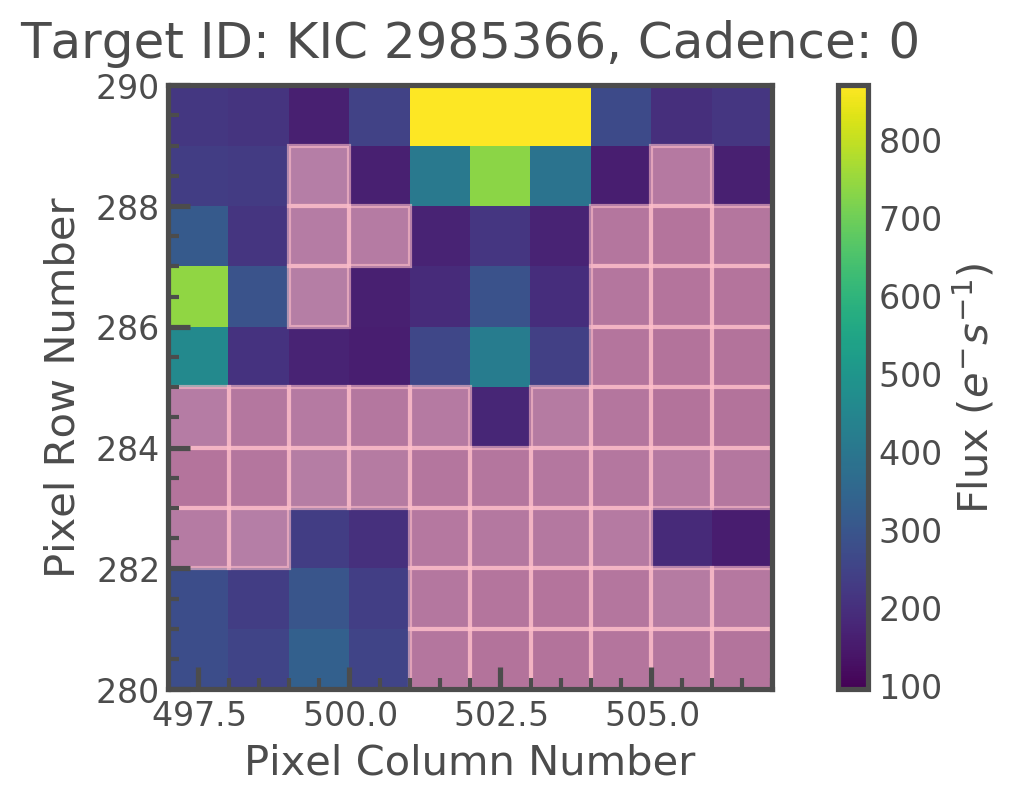

In [254]:
tess_tpf.plot(aperture_mask=bkg_mask)

In [255]:
clean_lc = tess_tpf.to_lightcurve(aperture_mask=target_mask) - tess_tpf.to_lightcurve(aperture_mask=bkg_mask).flux / bkg_mask.sum() * target_mask.sum()

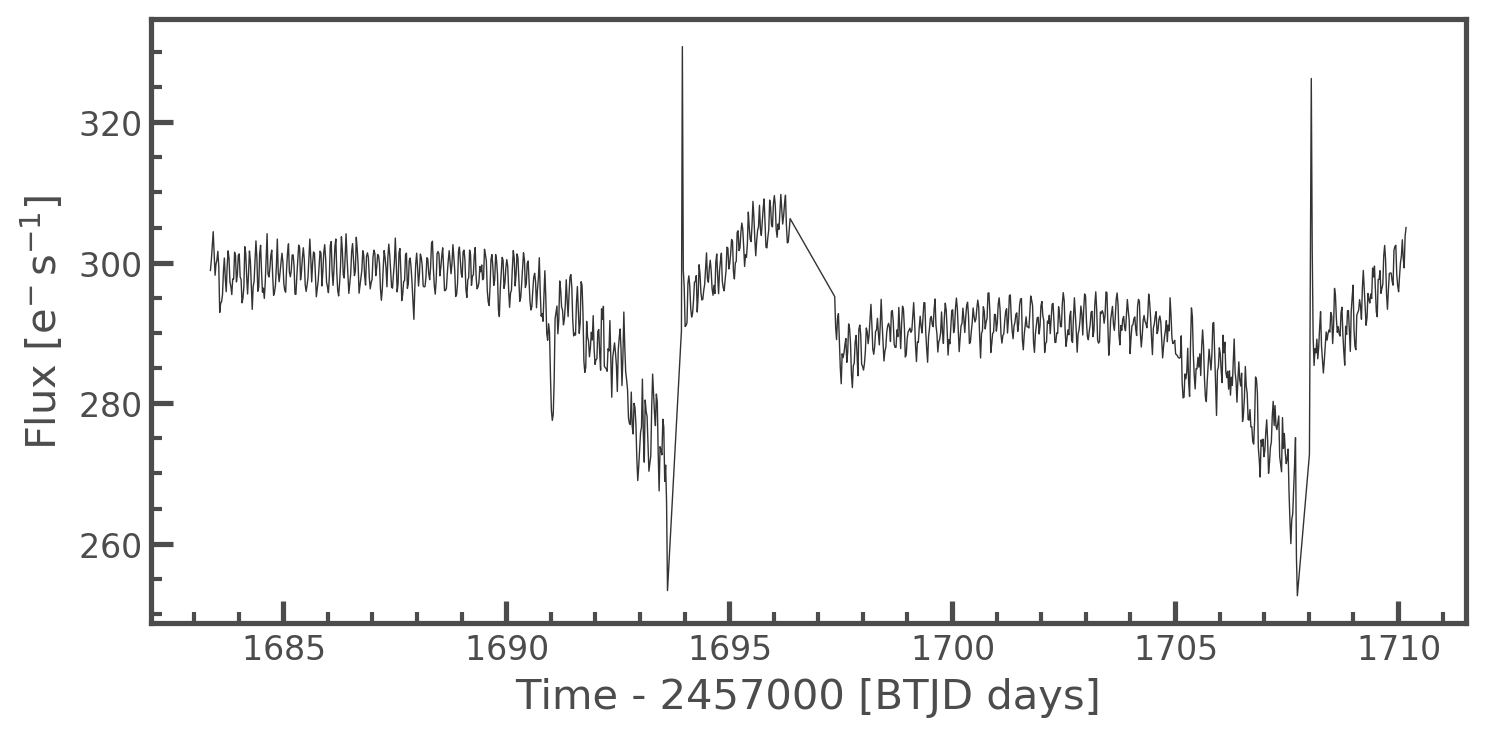

In [256]:
clean_lc.remove_outliers().plot()

In [257]:
good_time1 = (clean_lc.time < 1690) & (clean_lc.time > 1684)

In [258]:
clean_lc[good_time1].normalize().flux.std()

0.008115938

In [259]:
lcf.PDCSAP_FLUX.remove_outliers().normalize().flux.std()

0.0096830595

In [260]:
short_df.head()

KIC  Teff_McQuillan14   PRot  e_PRot       Rper  Teff_Berger18  \
0    1026474            4122.0  1.569   0.006   30471.80         4276.0   
125  2985366            4208.0  0.244   0.006   84608.58         4400.0   
153  3222610            4097.0  4.910   0.004   12517.96         4261.0   
192  3439126            4088.0  7.900   0.003   51793.99         4227.0   
215  3530387            4315.0  0.540   0.003  103690.27         4491.0   

     e_Teff     R*   E_R*   e_R*     AV  Evol  Bin  
0     150.0  0.679  0.054  0.049  0.136   0.0  0.0  
125   154.0  0.616  0.046  0.041  0.036   0.0  0.0  
153   149.0  0.600  0.045  0.041  0.069   0.0  0.0  
192   148.0  0.741  0.055  0.050  0.140   0.0  0.0  
215   157.0  0.597  0.045  0.041  0.183   0.0  0.0

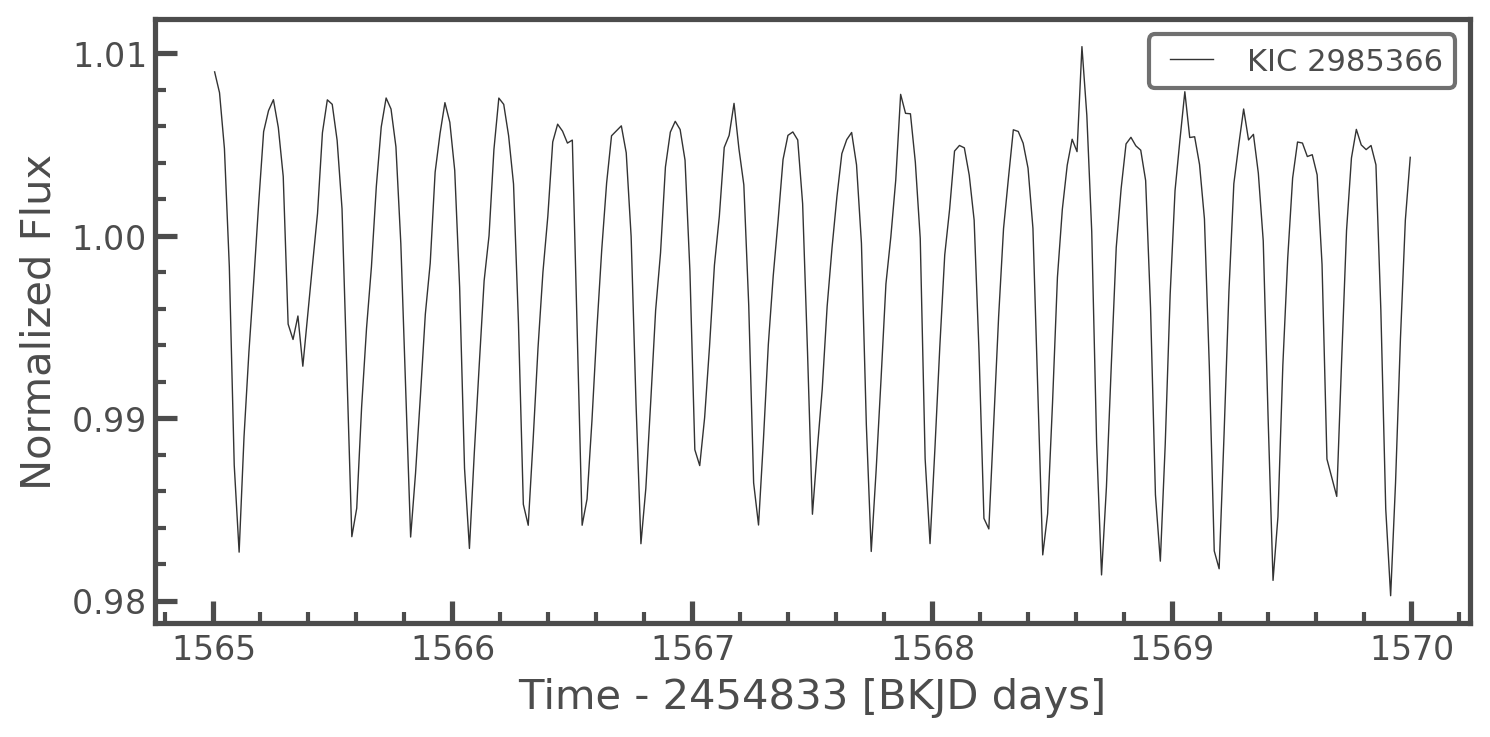

In [272]:
lcf.PDCSAP_FLUX[(lcf.time > 1565) & (lcf.time < 1570)].plot(normalize=True)

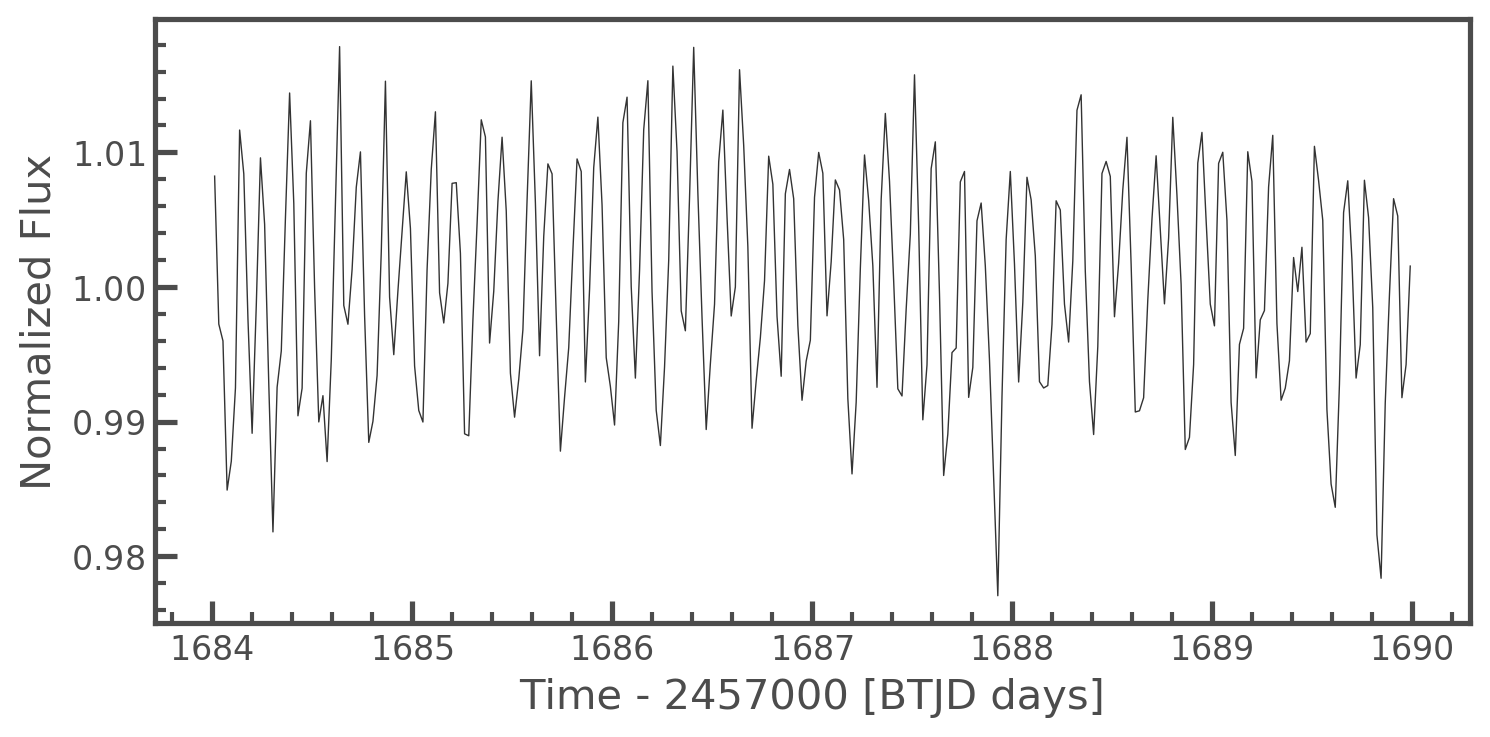

In [264]:
clean_lc[good_time1].normalize().plot()